In [1]:
##TP3

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()


In [3]:
#Exercice 5:

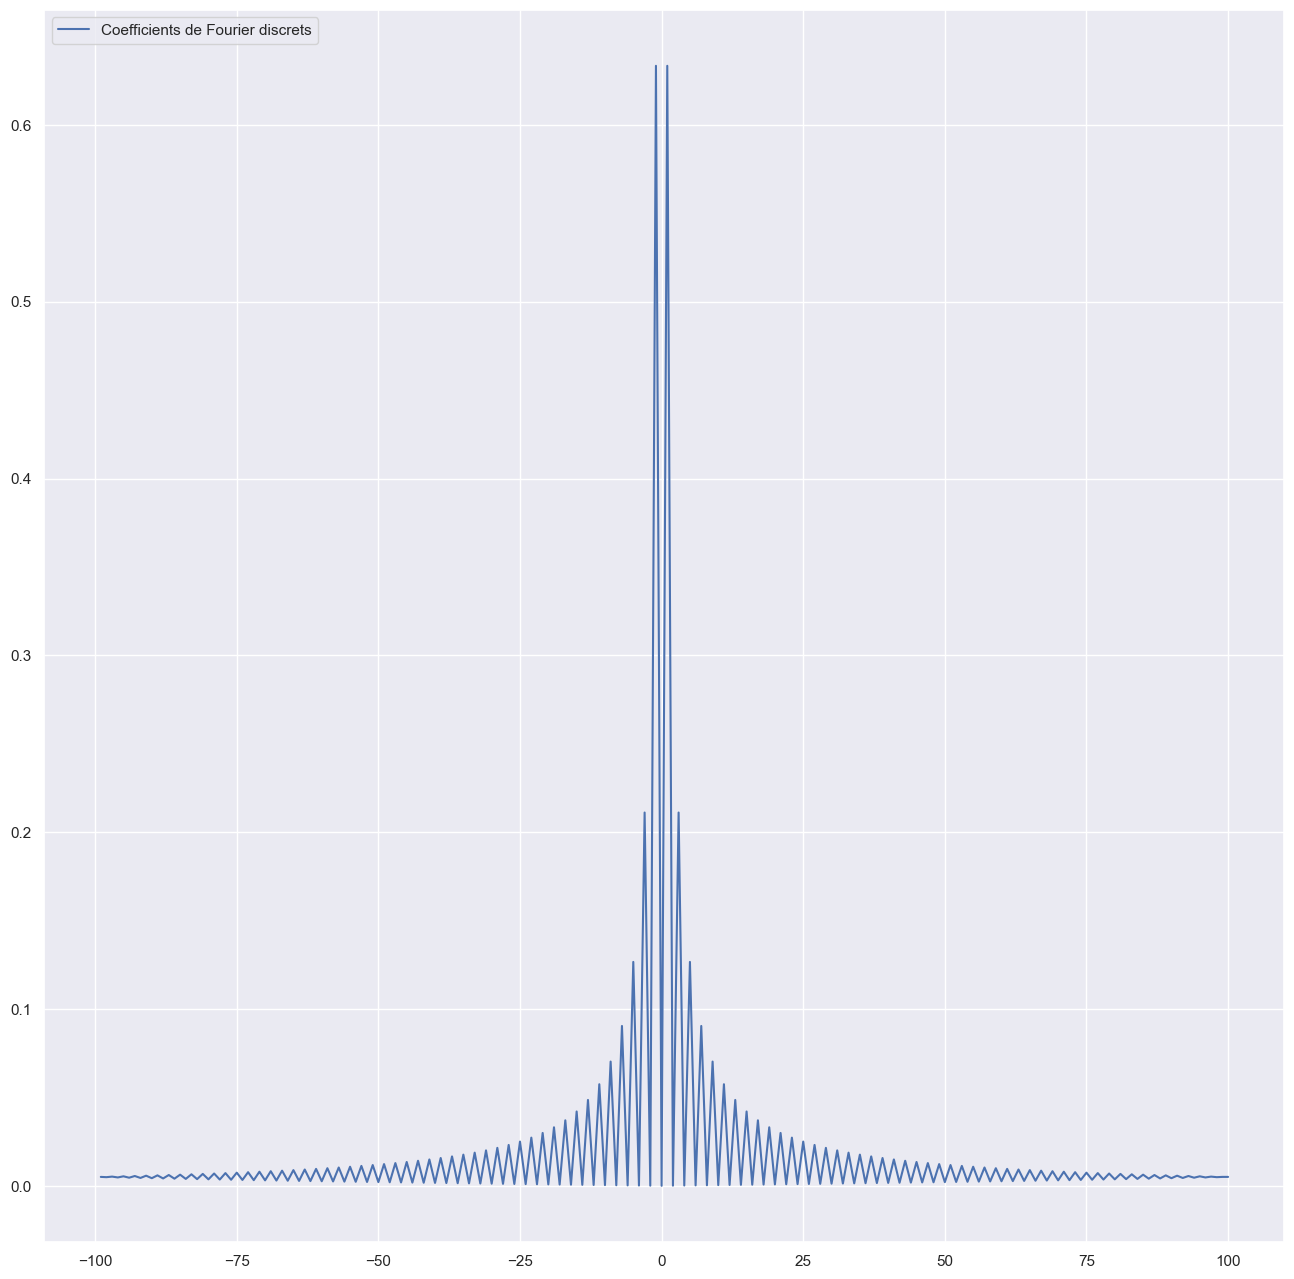

In [34]:
def u(x):
    return np.sign(x-np.pi)


def Coeff(N):
    U = np.zeros(2*N, dtype=complex)
    X = np.linspace(0,2*np.pi, 2*N)
    Y = u(X)
    for i in range(2*N):
        U[i] = 1/(2*N) * np.sum(Y*np.exp(-1j*(i-N+1)*X))
    return U



N = 100
V = np.abs(Coeff(N)) #per obtenir el mòdul de cada complex

fig, ax = plt.subplots(figsize=(16,16))
ax.plot(np.arange(-N+1, N+1), V, label="Coefficients de Fourier discrets")
plt.legend(loc='upper left')
plt.show()


3.1415926247196433


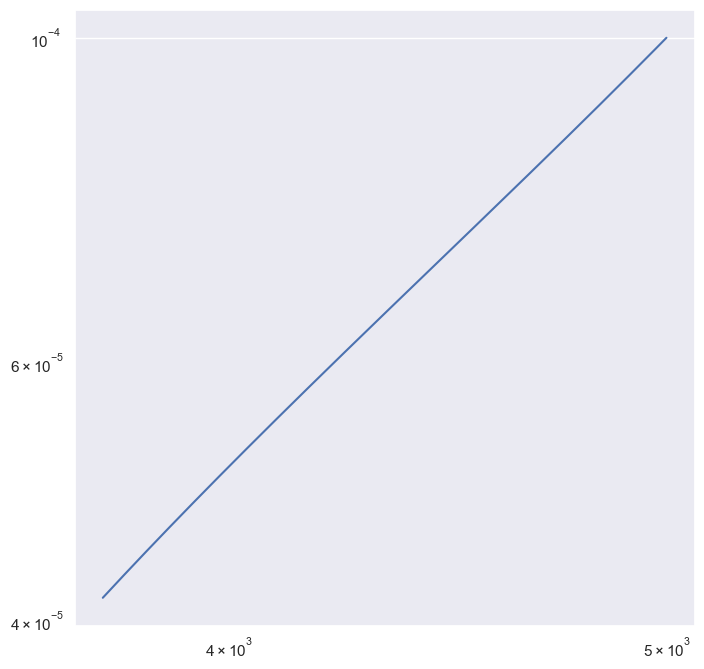

In [ ]:
#b)
#Trouver s tq a/k**s s'approxime a |u_k|
#on applique log a chaque côté et on procède a voir log(|u_k|) = log(a) - slog(k)
#on va utiliser seulement les coefficients impaires car les coefficients paires sont nuls
M= V[1::2] #on prend les coefficients impaires

#on calcule s:
s = (np.log(M[-1]) - np.log(M[-2]))/(np.log(len(M)) - np.log(len(M)-1))
print(s)

fig, ax = plt.subplots(figsize=(8,8))
ax.plot(np.arange(3*len(M)//4,len(M)),M[3*len(M)//4:])
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

#we observe that s=pi




In [ ]:
from scipy import integrate

def eN(x, N):
    E = [np.exp(1j*x*(i-N+1)) for i in range(2*N)]
    U = Coeff(N)
    S = u(x) - np.sum(U*E)
    return np.abs(S)**2

def integ(N):
    I = integrate.quad(eN,0,2*np.pi, args=(N,), limit=1000)[0]
    
    return np.sqrt(1/(2*np.pi) * I)

n = np.arange(1, 100, 5)
N = [integ(i) for i in n]

fig, ax = plt.subplots(figsize=(8,8))
ax.plot(n, N, label="Convergence de $||e_N||_2$ vers 0")
plt.legend()
plt.show()



    

In [ ]:
def u(x, N):
    return np.abs(np.exp(1j*N*x))**2